In [112]:
# Load packages
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
path = 'C:/Users/angel/Documents/Economics/Research/Banking Project/data/intermediate/sod'

# Set path to be the directory:
os.chdir(path)

In [114]:
# Load branch data:
sod = pd.read_csv('sod_data.csv', header=0, sep=',')
inst = pd.read_csv('sod_data_ins.csv', header=0, sep=',')

C:\Users\angel\AppData\Local\Temp\ipykernel_17224\334420980.py:2: DtypeWarning: Columns (13,28,50,59,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  sod = pd.read_csv('sod_data.csv', header=0, sep=',')
C:\Users\angel\AppData\Local\Temp\ipykernel_17224\334420980.py:3: DtypeWarning: Columns (13,28,50,59,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  inst = pd.read_csv('sod_data_ins.csv', header=0, sep=',')


In [115]:
# show columns 13,28,50,59,60,62:
cols = [13,28,50,59,60,62]

# Specify dtypes for col 13, 28, 50, 59, 60, 62:
sod.iloc[:,cols].dtypes

DEPSUMBR    object
NECNAMB     object
ASSET       object
DEPDOM      object
DEPSUM      object
ESCROW      object
dtype: object

In [116]:
# Check position 1411896:
sod.iloc[1411896,cols]

DEPSUMBR                        22,044,394
NECNAMB     Boston-Cambridge-Quincy, MA-NH
ASSET                          157,474,300
DEPDOM                          22,044,394
DEPSUM                          22,044,394
ESCROW                                 NaN
Name: 1411896, dtype: object

In [117]:
# Take commas away from columns 13, 28, 50, 59, 60, 62 so we can convert them to numeric:
sod.iloc[:,cols] = sod.iloc[:,cols].replace(',', '', regex=True)
inst.iloc[:,cols] = inst.iloc[:,cols].replace(',', '', regex=True)

In [118]:
sod.iloc[1411896,cols]

DEPSUMBR                         22044394
NECNAMB     Boston-Cambridge-Quincy MA-NH
ASSET                           157474300
DEPDOM                           22044394
DEPSUM                           22044394
ESCROW                                NaN
Name: 1411896, dtype: object

In [119]:
# Convert DEPSUMBR to numeric:
sod['DEPSUMBR'] = pd.to_numeric(sod['DEPSUMBR'], errors='coerce')

In [120]:
sod[sod['YEAR']<2000]['DEPSUMBR'].describe()

count    4.934060e+05
mean     4.182658e+04
std      2.048685e+05
min      0.000000e+00
25%      1.030600e+04
50%      2.367800e+04
75%      4.562375e+04
max      4.218929e+07
Name: DEPSUMBR, dtype: float64

In [121]:
# Value in USD
print('Deposits in 2022:', sod[sod['YEAR']==2022]['DEPSUMBR'].sum())
print('Deposits in 2022:', inst[inst['YEAR']==2022]['DEPSUMBR'].sum())

Deposits in 2022: 18141021926
Deposits in 2022: 1665780000051484050910413804887814606895962871531942456607411082699126497261632078482809133581321792402047321541370252038733928233403439934671389121128313222129931227998300901242168663831294648774010342140736486146302862503771125860054767295322928579164641765492770806012319285022172987394220682727296152018589719886700411306890385619121001158867417142031569364319001487739572075594344217235211114781832858097928251575311240579192883651228990234453000283482500486561405494616931666984996013764112762765226322654071090739365574196296237182106543858837818894461155427170512219625245590045536141463634790815618628786128555823155893717881172335405015280117525634175753349719350611689556297515108209039705406031876835352887802160459497618833381255546739478109355622417384610701575809156538167913815744139213446189165495248691829049002213374122573862173289363542230013910406537944283904117484265774894034367411893043328833853631432151073269951072655513843782

In [122]:
# Create dataset excluding the HQ: (ask Jason why to exclude the HQ)
df = sod[sod['BKMO']==0]

In [123]:
sod[sod['YEAR']<2010]['DEPSUMBR']

0           7563
1           2377
2          33490
3          20391
4          38465
           ...  
1411891        0
1411892        0
1411893        0
1411894        0
1411895        0
Name: DEPSUMBR, Length: 1411896, dtype: int64

In [124]:
# Sum DEPSUMBR and group by ID, MSANAMB, and YEAR
df_grouped = df.groupby(['RSSDID', 'MSANAMB', 'YEAR'])['DEPSUMBR'].sum().reset_index(name='sum_DEPSUMBR')

# The above code is summing the deposits over branches in the same MSANAMB and year. To see this run the following test:
print(df[(df['RSSDID']==5592340) & (df['YEAR']==2023)]['DEPSUMBR'])
df_grouped[(df_grouped['RSSDID']==5592340) & (df_grouped['YEAR']==2023)]

2669727    129753
2669728     33533
Name: DEPSUMBR, dtype: int64


,RSSDID,MSANAMB,YEAR,sum_DEPSUMBR
263477,5592340,"Orlando-Kissimmee-Sanford, FL",2023,163286


In [125]:
# Calculate total deposits per MSANAMB and YEAR
df_grouped['total'] = df_grouped.groupby(['MSANAMB', 'YEAR'])['sum_DEPSUMBR'].transform('sum')

# This code is calculating the total deposits per MSANAMB and year (summing among all IDs). To see this run the following test:
df_grouped[(df_grouped['MSANAMB']=='Orlando-Kissimmee-Sanford, FL') & (df_grouped['YEAR']==2023)]
# Note that all rows have the same value for total.

,RSSDID,MSANAMB,YEAR,sum_DEPSUMBR,total
5555,34537,"Orlando-Kissimmee-Sanford, FL",2023,1732373,70018920
11479,61832,"Orlando-Kissimmee-Sanford, FL",2023,131994,70018920
20910,110936,"Orlando-Kissimmee-Sanford, FL",2023,192691,70018920
34510,188430,"Orlando-Kissimmee-Sanford, FL",2023,67360,70018920
43624,229801,"Orlando-Kissimmee-Sanford, FL",2023,676902,70018920
45859,233031,"Orlando-Kissimmee-Sanford, FL",2023,2749244,70018920
63850,327435,"Orlando-Kissimmee-Sanford, FL",2023,601954,70018920
75703,395238,"Orlando-Kissimmee-Sanford, FL",2023,1076366,70018920
78071,408875,"Orlando-Kissimmee-Sanford, FL",2023,176415,70018920
79919,412751,"Orlando-Kissimmee-Sanford, FL",2023,65575,70018920


In [126]:
# Calculate the share
df_grouped['share'] = (df_grouped['sum_DEPSUMBR'] / df_grouped['total']) * 100

# We just computed the share of deposits per ID in the MSANAMB and year. 

In [127]:
df_grouped[(df_grouped['MSANAMB']=='Orlando-Kissimmee-Sanford, FL') & (df_grouped['YEAR']==2023)]

,RSSDID,MSANAMB,YEAR,sum_DEPSUMBR,total,share
5555,34537,"Orlando-Kissimmee-Sanford, FL",2023,1732373,70018920,2.474150
11479,61832,"Orlando-Kissimmee-Sanford, FL",2023,131994,70018920,0.188512
20910,110936,"Orlando-Kissimmee-Sanford, FL",2023,192691,70018920,0.275198
34510,188430,"Orlando-Kissimmee-Sanford, FL",2023,67360,70018920,0.096203
43624,229801,"Orlando-Kissimmee-Sanford, FL",2023,676902,70018920,0.966742
45859,233031,"Orlando-Kissimmee-Sanford, FL",2023,2749244,70018920,3.926430
63850,327435,"Orlando-Kissimmee-Sanford, FL",2023,601954,70018920,0.859702
75703,395238,"Orlando-Kissimmee-Sanford, FL",2023,1076366,70018920,1.537250
78071,408875,"Orlando-Kissimmee-Sanford, FL",2023,176415,70018920,0.251953
79919,412751,"Orlando-Kissimmee-Sanford, FL",2023,65575,70018920,0.093653


In [134]:
# For each year and MSANAMB, sum the squared shares of RSSDID:
df_grouped['sq_share'] = df_grouped['share']**2

In [136]:
df_grouped[(df_grouped['MSANAMB']=='Orlando-Kissimmee-Sanford, FL') & (df_grouped['YEAR']==2023)]

,RSSDID,MSANAMB,YEAR,sum_DEPSUMBR,total,share,sq_share,HHI,HHI_avg
5555,34537,"Orlando-Kissimmee-Sanford, FL",2023,1732373,70018920,2.474150,6.121417,1.338954e+07,1.558550e+07
11479,61832,"Orlando-Kissimmee-Sanford, FL",2023,131994,70018920,0.188512,0.035537,1.338954e+07,1.558550e+07
20910,110936,"Orlando-Kissimmee-Sanford, FL",2023,192691,70018920,0.275198,0.075734,1.338954e+07,1.558550e+07
34510,188430,"Orlando-Kissimmee-Sanford, FL",2023,67360,70018920,0.096203,0.009255,1.338954e+07,1.558550e+07
43624,229801,"Orlando-Kissimmee-Sanford, FL",2023,676902,70018920,0.966742,0.934589,1.338954e+07,1.558550e+07
45859,233031,"Orlando-Kissimmee-Sanford, FL",2023,2749244,70018920,3.926430,15.416854,1.338954e+07,1.558550e+07
63850,327435,"Orlando-Kissimmee-Sanford, FL",2023,601954,70018920,0.859702,0.739087,1.338954e+07,1.558550e+07
75703,395238,"Orlando-Kissimmee-Sanford, FL",2023,1076366,70018920,1.537250,2.363138,1.338954e+07,1.558550e+07
78071,408875,"Orlando-Kissimmee-Sanford, FL",2023,176415,70018920,0.251953,0.063480,1.338954e+07,1.558550e+07
79919,412751,"Orlando-Kissimmee-Sanford, FL",2023,65575,70018920,0.093653,0.008771,1.338954e+07,1.558550e+07


In [137]:
df_grouped['HHI'] = df_grouped.groupby(['MSANAMB', 'YEAR'])['sq_share'].transform('sum')

In [138]:
df_grouped

,RSSDID,MSANAMB,YEAR,sum_DEPSUMBR,total,share,sq_share,HHI,HHI_avg
0,0,"Boston-Cambridge-Newton, MA-NH",2000,8910,74864134,0.011902,0.000142,2841.831152,1.477663e+07
1,0,"Boston-Cambridge-Newton, MA-NH",2001,8855,73718798,0.012012,0.000144,1929.931537,1.439370e+07
2,0,"Memphis, TN-MS-AR",2000,2682,9874455,0.027161,0.000738,1408.021701,1.477663e+07
3,0,"Memphis, TN-MS-AR",2001,2786,10484072,0.026574,0.000706,1383.661833,1.439370e+07
4,0,"Nashville-Davidson-Murfreesboro-Franklin, TN",2000,839,15923725,0.005269,0.000028,1387.496472,1.477663e+07
...,...,...,...,...,...,...,...,...,...
263476,5592340,"Orlando-Kissimmee-Sanford, FL",2022,72726,73973332,0.098314,0.009666,1347.909121,1.535063e+07
263477,5592340,"Orlando-Kissimmee-Sanford, FL",2023,163286,70018920,0.233203,0.054383,1338.953853,1.558550e+07
263478,5692473,"Miami-Fort Lauderdale-Pompano Beach, FL",2023,6841,302041569,0.002265,0.000005,982.504074,1.558550e+07
263479,5784921,"Watertown-Fort Drum, NY",2023,19031,1323908,1.437487,2.066368,2837.944516,1.558550e+07


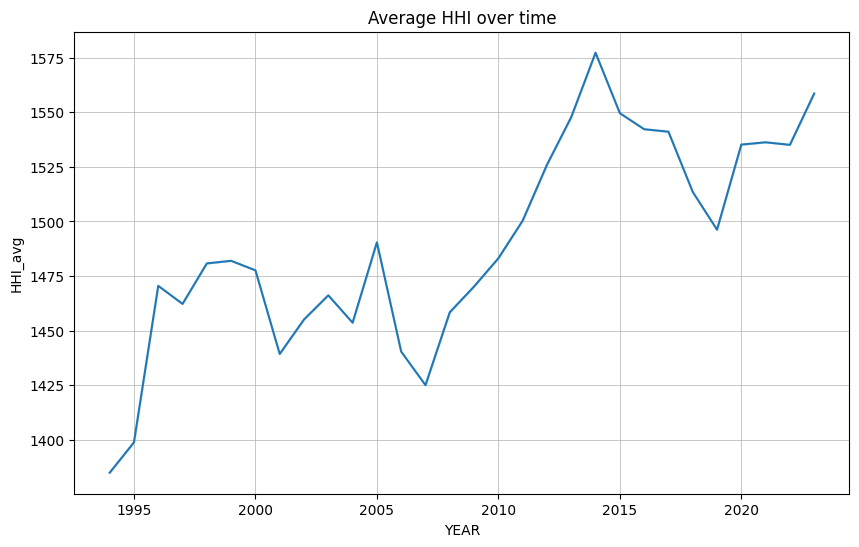

In [139]:
# Average the 'HHI' among all 'MSANAMB' for each year:
df_grouped['HHI_avg'] = df_grouped.groupby('YEAR')['HHI'].transform('mean')

# Plot the HHI_avg over time:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_grouped, x='YEAR', y='HHI_avg')
plt.title('Average HHI over time')
plt.grid('lightgray', linestyle='-', linewidth=0.5)
plt.show()

